In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

import seaborn as sns
iris = load_iris()
X, y = load_iris(return_X_y=True)
bos = load_boston()
X1, y1 = load_boston(return_X_y=True)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import matplotlib.pyplot as plt
def metricasregresion(ytest, predic ):
  print ('max error:',max_error(ytest, predic))
  print ('MAE error:',mean_absolute_error(ytest, predic))
  print ('MSE error:',mean_squared_error(ytest, predic))
  print ('RMSE error:',mean_squared_error(ytest, predic, squared=False))
  print ('RSS error:', mean_squared_error(ytest, predic)*len(predic))
  print ('R2 Score:', r2_score(ytest, predic))

def validacioncruzada(clf, X_test, ypredic, divisiones):
  print("Validación cruzada. Evaluación por cada división: ", 
        cross_val_score(clf, X_test, ypredic, cv=divisiones))
  print("Evaluación media:", cross_val_score(clf,  X_test, ypredic, cv=divisiones).mean())

def mostrarresultados(ytest, ypredict, titulo, LABELS):
  conf_matrix = confusion_matrix(ytest, ypredict)
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
  titulo="Matriz de confusión.", titulo
  plt.title(titulo)
  plt.ylabel('Clase verdadera')
  plt.xlabel('Clase Predicha')
  plt.show()
  print (classification_report(ytest, ypredict))


In [ ]:
X, y = load_iris(return_X_y=True)
X1, y1 = load_boston(return_X_y=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, random_state=0)

In [ ]:
#IRIS model 1
model1 = SVC(kernel='linear', C=1E10)
model1.fit(X, y)
print ("Índice de los vectores:",model1.support_)
print ("Vectores de soporte:",model1.support_vectors_)
print ("Número de vectores por clase:",model1.n_support_)
print ("Etiquetas de las clases:",model1.classes_)


Índice de los vectores: [ 23  24  41  70  77  83  98 106 126 129 133 138]
Vectores de soporte: [[5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [4.5 2.3 1.3 0.3]
 [5.9 3.2 4.8 1.8]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]
 [5.1 2.5 3.  1.1]
 [4.9 2.5 4.5 1.7]
 [6.2 2.8 4.8 1.8]
 [7.2 3.  5.8 1.6]
 [6.3 2.8 5.1 1.5]
 [6.  3.  4.8 1.8]]
Número de vectores por clase: [3 4 5]
Etiquetas de las clases: [0 1 2]


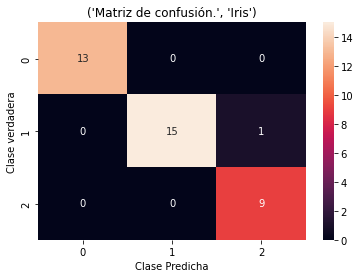

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Validación cruzada. Evaluación por cada división:  [1. 1. 1.]
Evaluación media: 1.0


In [ ]:
ypred1 = model1.predict(Xtest)
LABELS=model1.classes_
titulo="Iris"
mostrarresultados(ytest, ypred1, titulo, LABELS)
validacioncruzada(model1, Xtest, ypred1, 3)

In [ ]:
#Boston model 1
model2 = SVR( C=1.0, epsilon=0.2)
model2.fit(X1, y1)
print ("Índice de los vectores:",model2.support_)
print ("Vectores de soporte:",model2.support_vectors_)
print ("Número de vectores se soporte:",model2.n_support_)


Índice de los vectores: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  74
  75  76  78  79  80  81  82  83  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 217 218 219 220 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 240 241 242 243 244 245
 246 247 248 249 250 251 25

In [ ]:
ypred2 = model2.predict(Xtest1)
metricasregresion(ytest1, ypred2 )
validacioncruzada(model2, Xtest1, ypred2, 5)

max error: 34.479291102834104
MAE error: 5.24807900494413
MSE error: 74.2431752855803
RMSE error: 8.616447950610524
RSS error: 9428.883261268698
R2 Score: 0.09125985316317375
Validación cruzada. Evaluación por cada división:  [0.9892537  0.98851553 0.98005442 0.98633365 0.98586578]
Evaluación media: 0.9860046178804595
